# Export results

In [1]:
import os
import glob
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import hygeia.utils.hplots as hp
import metrics_tools as mt

In [2]:
data_name = 'Prostate'

time_points = [
    'T02_Cast_Day7', 'T03_Cast_Day14', 
    'T04_Cast_Day28', 'T05_Regen_Day1', 'T06_Regen_Day2',
    'T07_Regen_Day3', 'T08_Regen_Day7', 'T09_Regen_Day14',
    'T10_Regen_Day28'
]

all_results = []
for time_point in time_points:
    for i in range(1, 11):
        all_results.append(f'{time_point}_{i}')

In [4]:
colors = {
    'scDisentangle': '#d62728',
    'Pert agnostic baseline': '#698396',
    'Cell type agnostic baseline': '#00FFFF',
    }

In [5]:
base_path = f'results/{data_name}'

In [6]:
folder_paths = {
     'scDisentangle': f'{base_path}/SCDISENTANGLE/',
     'Pert agnostic baseline': f'{base_path}/Pert Mean/',
     'Cell type agnostic baseline': f'{base_path}/Stim Baseline/',
}

In [9]:
os.makedirs('/data/scDisentangle figures/Prostate/Benchmarks/', exist_ok=True)

Using 9 perturbation


/home/SE/Desktop/Projects/SCDISENTANGLE/hygeia/hygeia/utils/hplots.py:270: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


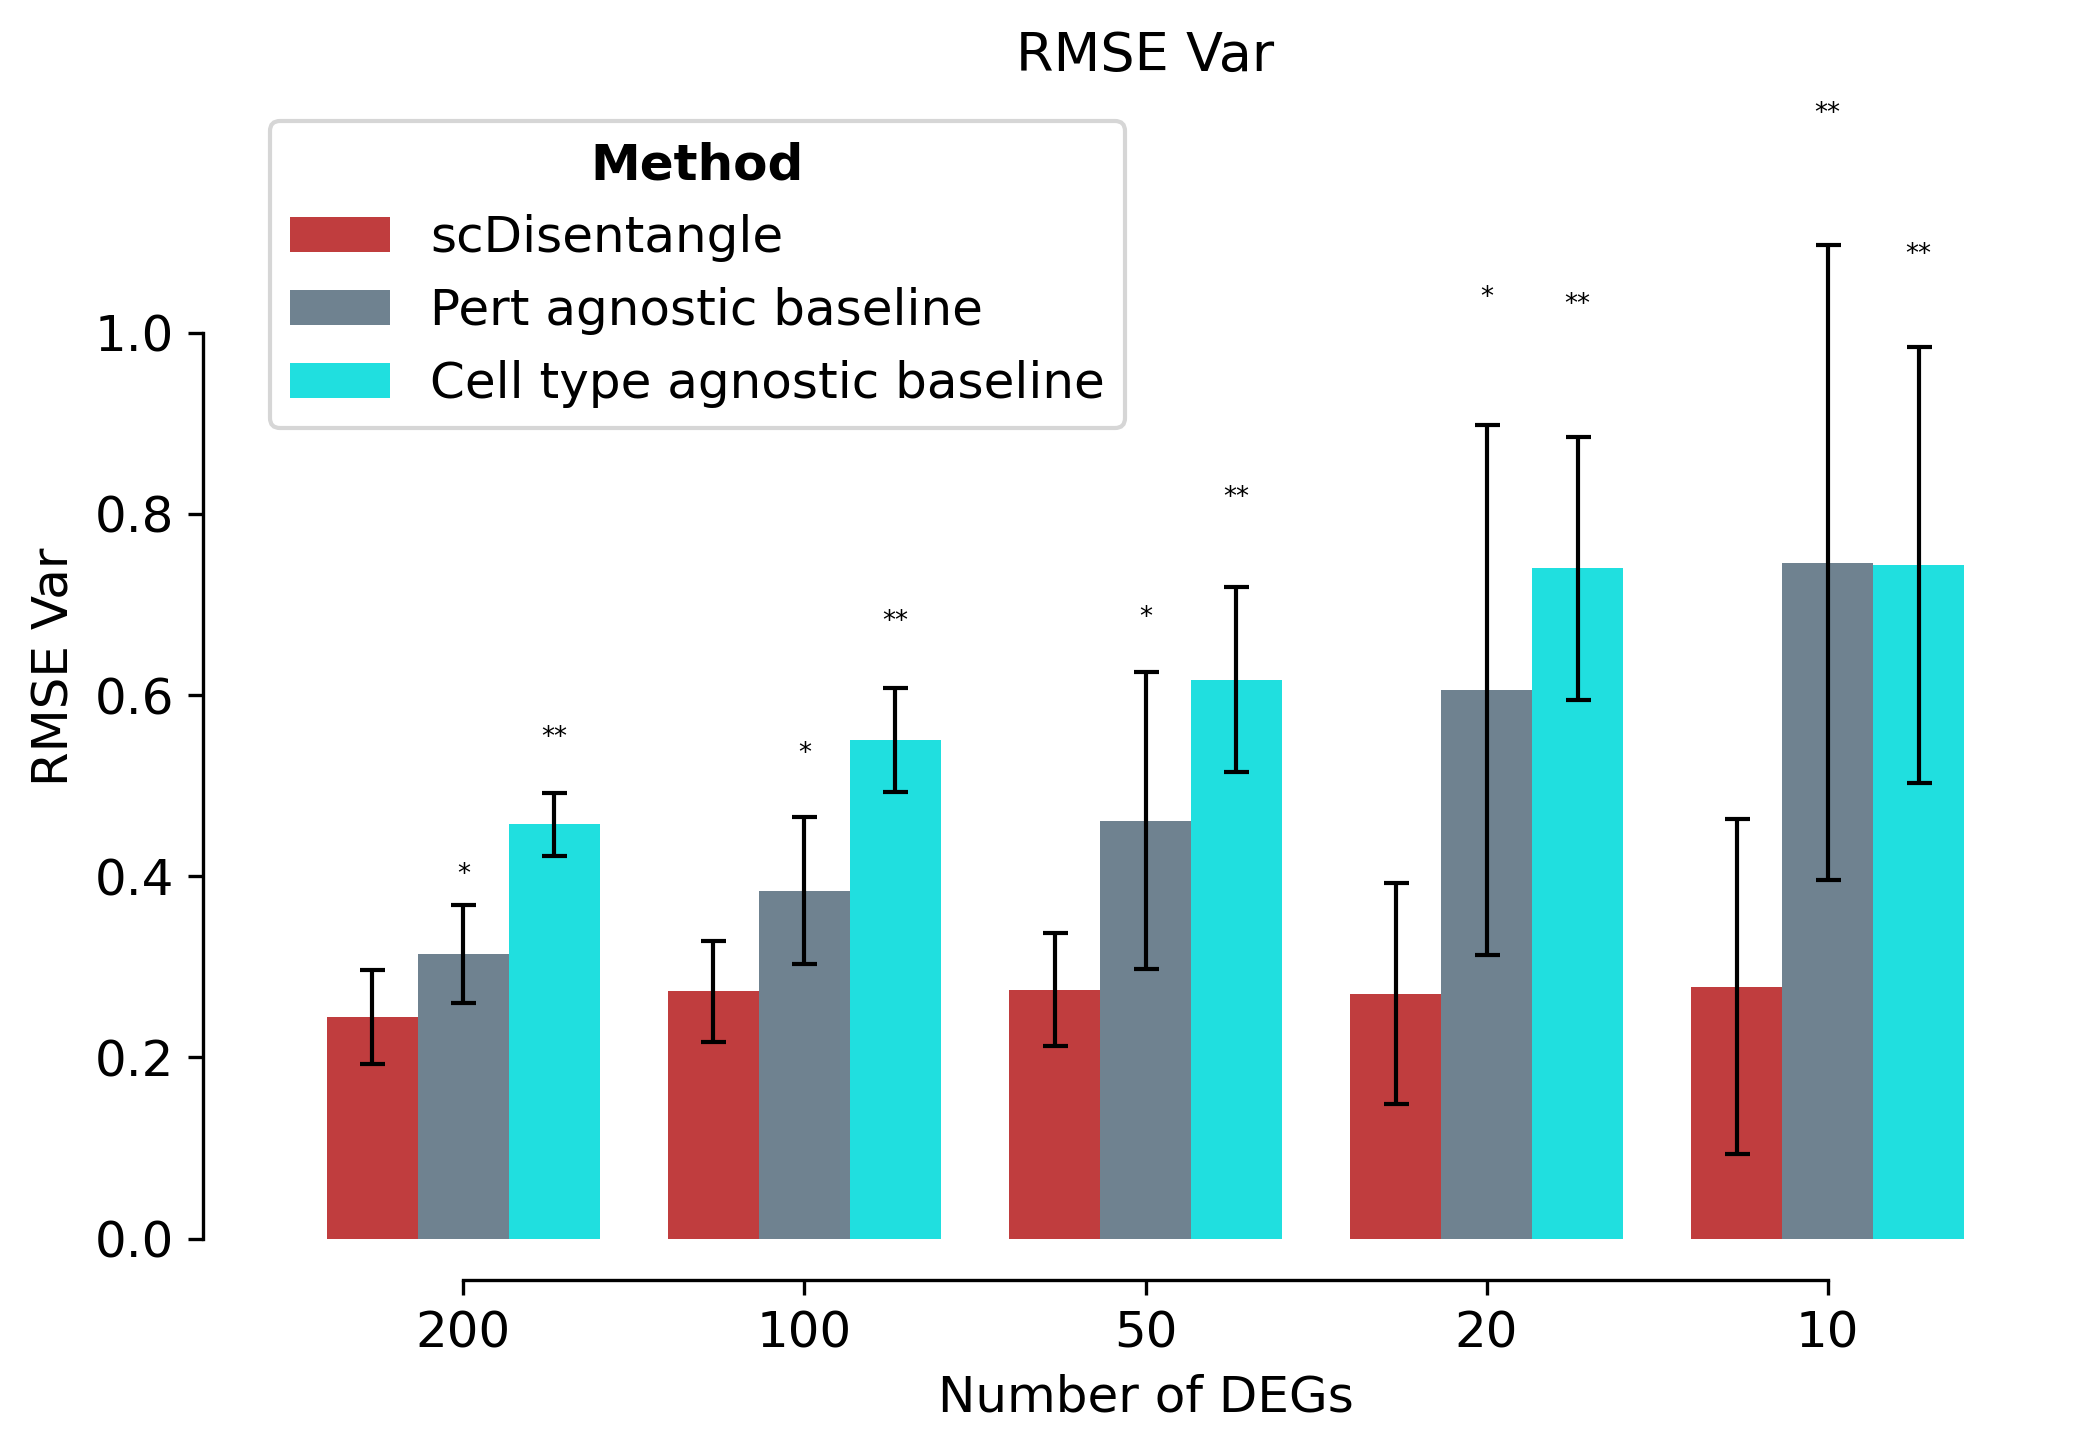

In [19]:
n_degs_list = ['200', '100', '50', '20', '10']
metric_name = 'RMSE Var'

metrics = mt.get_results(
    folder_paths, 
    metric_name=metric_name, 
    perts = all_results, 
    n_degs_list=n_degs_list
)

pvals, stars = mt.compute_pvalues(
    metrics,
    metric_name=metric_name,
    higher_is_better=None,
    anchor_method='scDisentangle'
)

records = hp.plot_data(
            metrics,
            plot_type='barplot', 
            save_path=None, #f'/data/scDisentangle figures/Prostate/Benchmarks/{metric_name}',
            y_name=metric_name, 
            legend=True, 
            title=metric_name,
            colors=colors,
            show_grid=False,
            sort_order=None,
            stars=stars
        )

In [ ]:
np.mean(metrics['SCDISENTANGLE']['10'])

In [ ]:
np.mean(metrics['Stim Baseline']['10'])